<a href="https://colab.research.google.com/github/Longsieunhan/IA-Project/blob/master/Coding_Challenge_Hand_written_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training set: (60000, 28, 28), Labels: (60000,)
Test set: (10000, 28, 28), Labels: (10000,)
Class distribution in training set: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


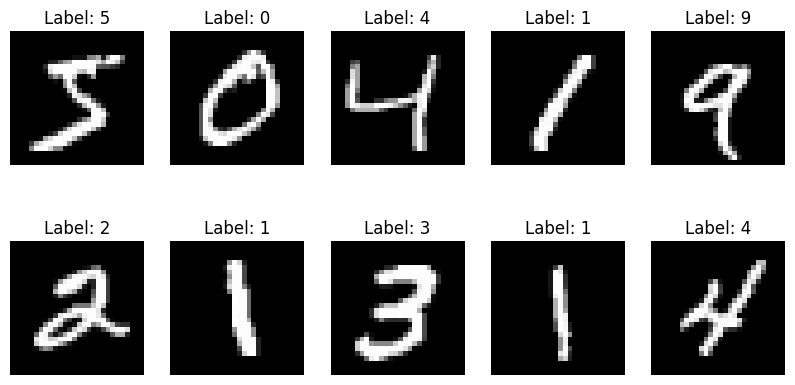

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Check dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Test set: {x_test.shape}, Labels: {y_test.shape}")

# Count examples per class
unique, counts = np.unique(y_train, return_counts=True)
print("Class distribution in training set:", dict(zip(unique, counts)))

# Visualize some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"Label: {y_train[i]}")
    ax.axis('off')
plt.show()




In [7]:
from tensorflow.keras.utils import to_categorical

# Normalize input images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape for neural network input
x_train = x_train.reshape(-1, 28*28)  # Flattening
x_test = x_test.reshape(-1, 28*28)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Function to create models with different architectures
def create_model(layers=[128], activation='relu'):
    model = Sequential([Flatten(input_shape=(28, 28))])  # Flatten image
    for units in layers:
        model.add(Dense(units, activation=activation))
    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes
    return model

# Define three models with different capacities
models = {
    "Small Model": create_model([64]),
    "Medium Model": create_model([128, 64]),
    "Large Model": create_model([256, 128, 64])
}


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

# Function to create a model
def create_model(hidden_units=128, optimizer="sgd"):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train with SGD
model_sgd = create_model(optimizer=SGD(learning_rate=0.01))
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Train with Adam
model_adam = create_model(optimizer=Adam(learning_rate=0.001))
history_adam = model_adam.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7247 - loss: 1.0707 - val_accuracy: 0.9027 - val_loss: 0.3573
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8989 - loss: 0.3580 - val_accuracy: 0.9182 - val_loss: 0.2908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9178 - loss: 0.2922 - val_accuracy: 0.9266 - val_loss: 0.2603
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9264 - loss: 0.2598 - val_accuracy: 0.9319 - val_loss: 0.2393
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9314 - loss: 0.2418 - val_accuracy: 0.9372 - val_loss: 0.2211
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9374 - loss: 0.2211 - val_accuracy: 0.9404 - val_loss: 0.2062
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9436 - loss: 0.2053 - val_accuracy: 0.9438 - val_loss: 0.1937
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9466 - loss: 0.1920 

In [10]:
def create_deep_model(optimizer="sgd"):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(28*28,)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_deep = create_deep_model(optimizer=Adam(learning_rate=0.001))
history_deep = model_deep.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8940 - loss: 0.3572 - val_accuracy: 0.9660 - val_loss: 0.1082
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9735 - loss: 0.0848 - val_accuracy: 0.9720 - val_loss: 0.0857
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9828 - loss: 0.0534 - val_accuracy: 0.9701 - val_loss: 0.1021
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9874 - loss: 0.0385 - val_accuracy: 0.9809 - val_loss: 0.0705
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9898 - loss: 0.0307 - val_accuracy: 0.9789 - val_loss: 0.0773
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9925 - loss: 0.0243 - val_accuracy: 0.9813 - val_loss: 0.0705
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9798 - val_loss: 0.0754
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9946 - loss: 0

In [11]:
def create_wide_model(optimizer="adam"):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(28*28,)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_wide = create_wide_model(optimizer=Adam(learning_rate=0.001))
history_wide = model_wide.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8997 - loss: 0.3421 - val_accuracy: 0.9643 - val_loss: 0.1149
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9739 - loss: 0.0857 - val_accuracy: 0.9760 - val_loss: 0.0788
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9847 - loss: 0.0492 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9885 - loss: 0.0348 - val_accuracy: 0.9786 - val_loss: 0.0683
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9918 - loss: 0.0249 - val_accuracy: 0.9758 - val_loss: 0.0898
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9934 - loss: 0.0193 - val_accuracy: 0.9792 - val_loss: 0.0760
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9775 - val_loss: 0.0845
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9949 -

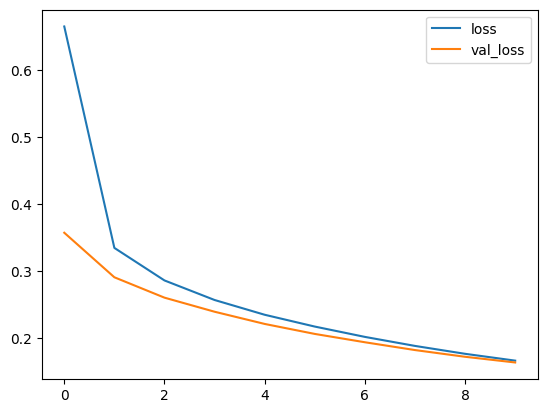

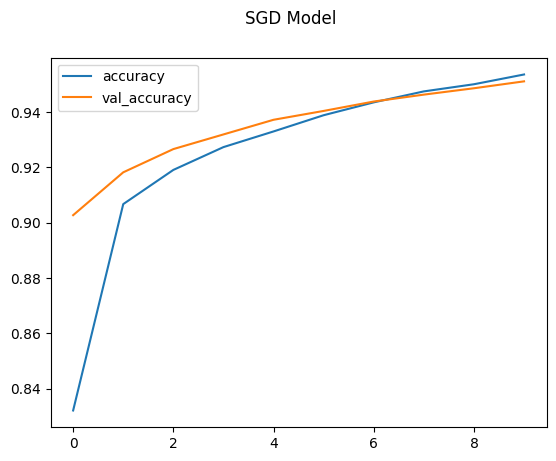

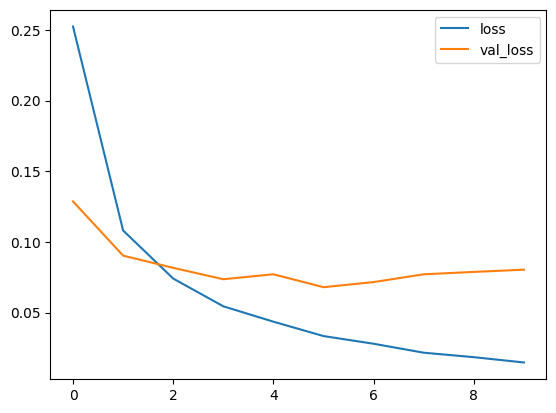

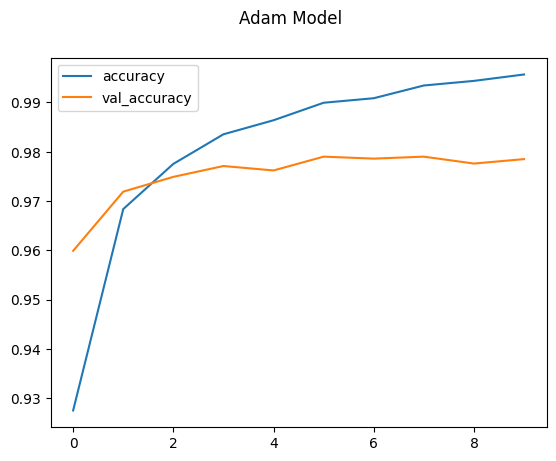

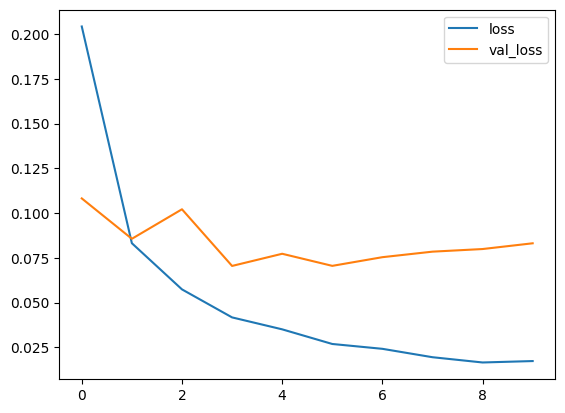

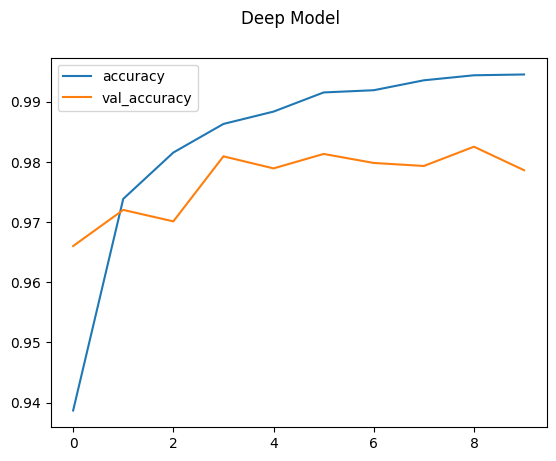

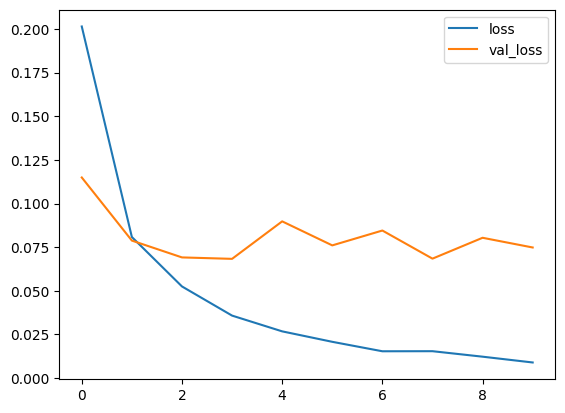

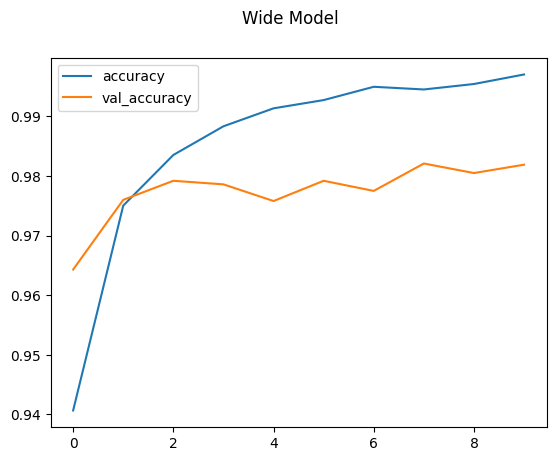

In [12]:
import pandas as pd

def plot_training_history(history, title):
    pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
    pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
    plt.suptitle(title)
    plt.show()

plot_training_history(history_sgd, "SGD Model")
plot_training_history(history_adam, "Adam Model")
plot_training_history(history_deep, "Deep Model")
plot_training_history(history_wide, "Wide Model")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


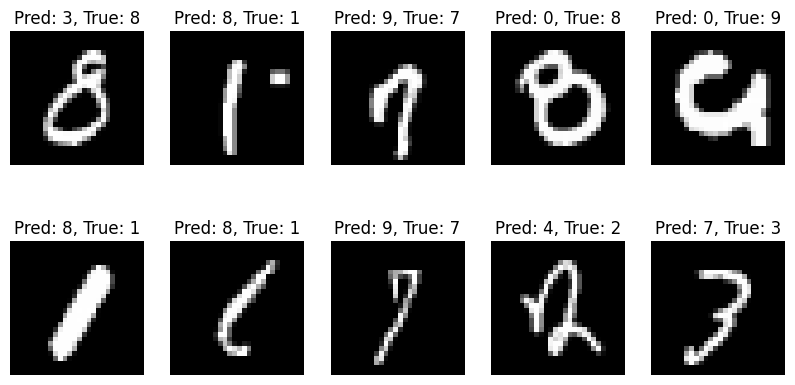

In [13]:
import random

# Get predictions
y_pred = model_wide.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Get misclassified indices
misclassified_idx = np.where(y_pred_classes != y_true_classes)[0]

# Display 10 random misclassified images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    index = random.choice(misclassified_idx)
    ax.imshow(x_test[index].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred_classes[index]}, True: {y_true_classes[index]}")
    ax.axis('off')
plt.show()